In [ ]:
import os
import torch
import os
import matplotlib.pyplot as plt
import cv2
import scipy
import numpy as np
from PIL import Image

In [ ]:
from IPython import display
display.clear_output()

In [ ]:
!pip install ultralytics

# Train

In [ ]:
DATA_DIR = '/kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/' #directory with data.yaml configuration file

In [ ]:
with open(f'{DATA_DIR}data.yaml', 'r') as f:
    print(f.read())

In [ ]:
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors

In [ ]:
# Load a model
model = YOLO('yolov8x.pt', task='detect')


In [ ]:
results = model.train(data=f'{DATA_DIR}data.yaml', epochs=100, imgsz=640, verbose=False)

# Check

# 100 epochs yolov8x

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(Image.open("/kaggle/working/runs/detect/train/results.png"))

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0][0].imshow(Image.open("/kaggle/working/runs/detect/train/PR_curve.png"))
ax[0][1].imshow(Image.open("/kaggle/working/runs/detect/train/F1_curve.png"))
ax[1][0].imshow(Image.open("/kaggle/working/runs/detect/train/R_curve.png"))
ax[1][1].imshow(Image.open("/kaggle/working/runs/detect/train/P_curve.png"))


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(Image.open("/kaggle/working/runs/detect/train/train_batch1.jpg"))
ax[1].imshow(Image.open("/kaggle/working/runs/detect/train/train_batch6302.jpg"))
None

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
ax[0].imshow(Image.open("/kaggle/working/runs/detect/train/val_batch0_pred.jpg"))
ax[1].imshow(Image.open("/kaggle/working/runs/detect/train/val_batch0_labels.jpg"))
None

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(Image.open('/kaggle/working/runs/detect/train/confusion_matrix_normalized.png'))
None

In [ ]:
# Export the model
model.export(format='onnx')

# 50 epochs yolov8x

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(Image.open("/kaggle/working/runs/detect/train/train_batch0.jpg"))
ax[1].imshow(Image.open("/kaggle/working/runs/detect/train/train_batch2871.jpg"))
None

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
ax[0].imshow(Image.open("/kaggle/working/runs/detect/train/val_batch2_pred.jpg"))
ax[1].imshow(Image.open("/kaggle/working/runs/detect/train/val_batch2_labels.jpg"))
None

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(Image.open('/kaggle/working/runs/detect/train/confusion_matrix_normalized.png'))
None

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0][0].imshow(Image.open("/kaggle/working/runs/detect/train/results.png"))
ax[0][1].imshow(Image.open("/kaggle/working/runs/detect/train/F1_curve.png"))
ax[1][0].imshow(Image.open("/kaggle/working/runs/detect/train/R_curve.png"))
ax[1][1].imshow(Image.open("/kaggle/working/runs/detect/train/P_curve.png"))


# Cropping

In [ ]:
TEST_DIR = DATA_DIR + "test/images/"

In [ ]:
crop_dir_name='/kaggle/working/runs/crops_test'

In [ ]:
im0 = cv2.imread('/kaggle/input/posm-data/test/images/942539_1089_jpg.rf.049dc8e9724ec44c92597a5ae52cbc8e.jpg')

In [ ]:

res = model.predict('/kaggle/input/posm-data/test/images/942539_1089_jpg.rf.049dc8e9724ec44c92597a5ae52cbc8e.jpg', save=True, retina_masks=True)

In [ ]:
Image.open('/kaggle/working/runs/detect/train4/942539_1089_jpg.rf.049dc8e9724ec44c92597a5ae52cbc8e.jpg')

In [ ]:
names = model.names
print(names)

In [ ]:
# results = model.predict(im0, show=False)
boxes = res[0].boxes.xyxy.cpu().tolist()
clss = res[0].boxes.cls.cpu().tolist()
annotator = Annotator(im0, line_width=2, example=names)

In [ ]:
os.listdir('/kaggle/working/runs/')
os.mkdir(crop_dir_name)

In [ ]:
idx=0
if boxes is not None:
    for box, cls in zip(boxes, clss):
        print("LOGGING, " , names[int(cls)])
        annotator.box_label(box, color=colors(int(cls), True), label=names[int(cls)])
        crop_obj = im0[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
        cv2.imwrite(os.path.join(crop_dir_name, names[int(cls)]+".png"), crop_obj)
        idx += 1

    plt.imshow(im0)

In [ ]:
os.listdir(crop_dir_name)

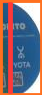

In [81]:
Image.open(os.path.join(crop_dir_name, 'Yota.png'))

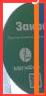

In [82]:
# Image.open(os.path.join(crop_dir_name, '1.png'))
Image.open(os.path.join(crop_dir_name, 'Megafon.png'))